In [1]:
import scvelo as scv
scv.set_figure_params('scvelo')
scv.settings.presenter_view = True

In [2]:
adata = scv.read("case3_data/velocyto.neonatal_testis.germ_cells.h5ad")
adata

Only considering the two last: ['.germ_cells', '.h5ad'].
Only considering the two last: ['.germ_cells', '.h5ad'].


AnnData object with n_obs × n_vars = 2233 × 54446
    obs: 'orig.ident', 'Library', 'Dpp', 'SizeFactor', 'Ribo.percent', 'res.0.4', 'Batch', 'pANN_0.25_0.08_270', 'DF.classifications_0.25_0.08_270', 'DF.classifications_0.25_0.08_240', 'DF_hi.lo', 'DF.known_marker', 'DF.combine', 'res.0.6', 'cluster', 'cell_type', 'nCount_RNA', 'nFeature_RNA', 'mapQ', 'mapQ.padj', 'celltype.svm', 'celltype.major'
    var: 'features', 'ambiguous_features', 'spanning_features', 'spliced_features', 'unspliced_features'
    obsm: 'X_umap_harmony', 'X_umap_pca', 'X_umap_proj'
    layers: 'ambiguous', 'spanning', 'spliced', 'unspliced'

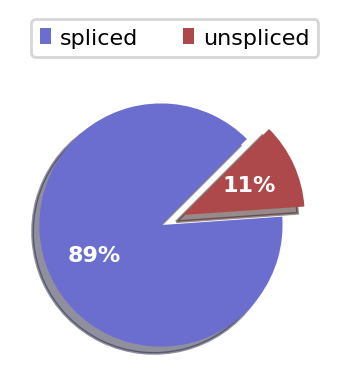

In [3]:
scv.pl.proportions(adata)

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 39036 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


In [5]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [6]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/24 cores)


  0%|          | 0/2233 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [8]:
ident_colours = ["#1F77B4","#FF7F0E","#2CA02C","#D62728","#9467BD","#8C564B","#E377C2","#7F7F7F"]

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap_pca', embedded velocity vectors (adata.obsm)


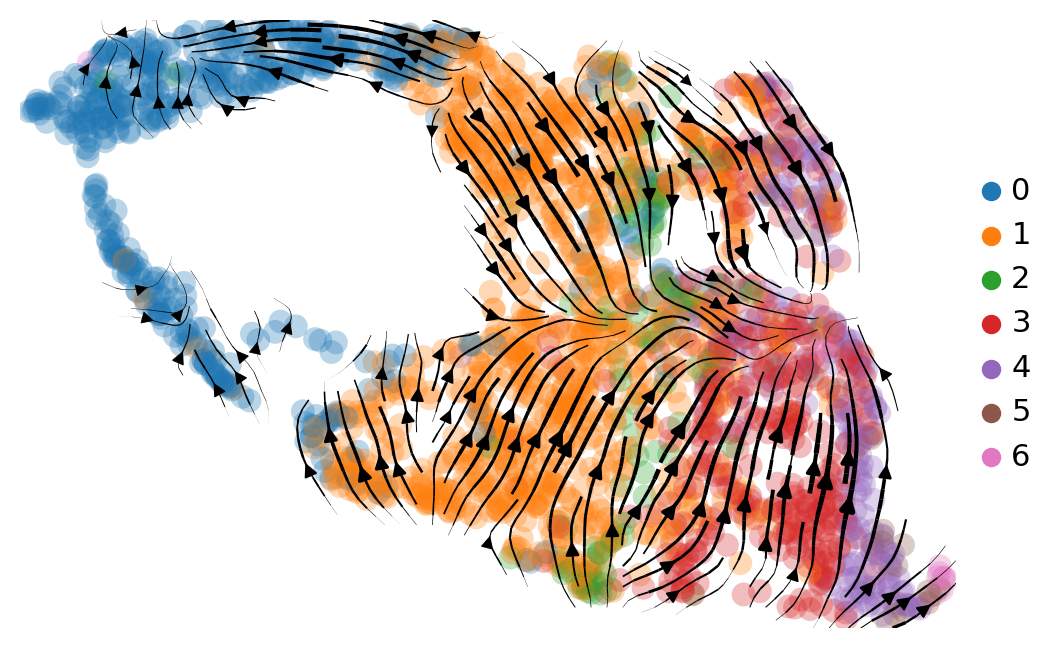

In [9]:
scv.pl.velocity_embedding_stream(adata, basis="X_umap_pca", color="celltype.svm", 
                                 title = "", palette=ident_colours, legend_loc="right")

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap_harmony', embedded velocity vectors (adata.obsm)


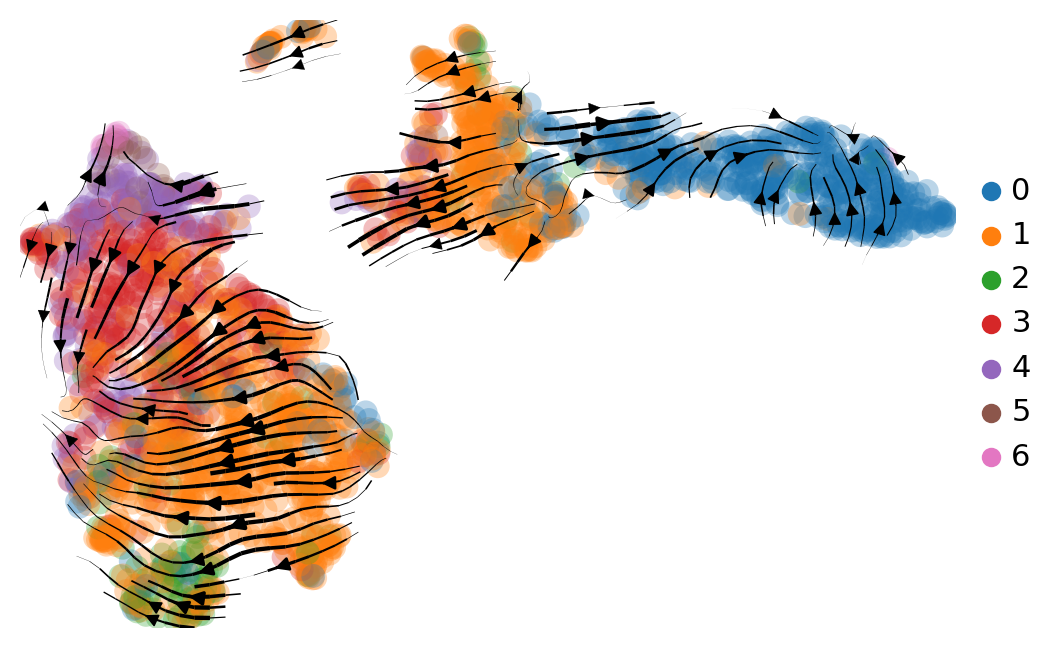

In [10]:
scv.pl.velocity_embedding_stream(adata, basis="X_umap_harmony", color="celltype.svm", 
                                 title = "", palette=ident_colours, legend_loc="right")

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap_proj', embedded velocity vectors (adata.obsm)


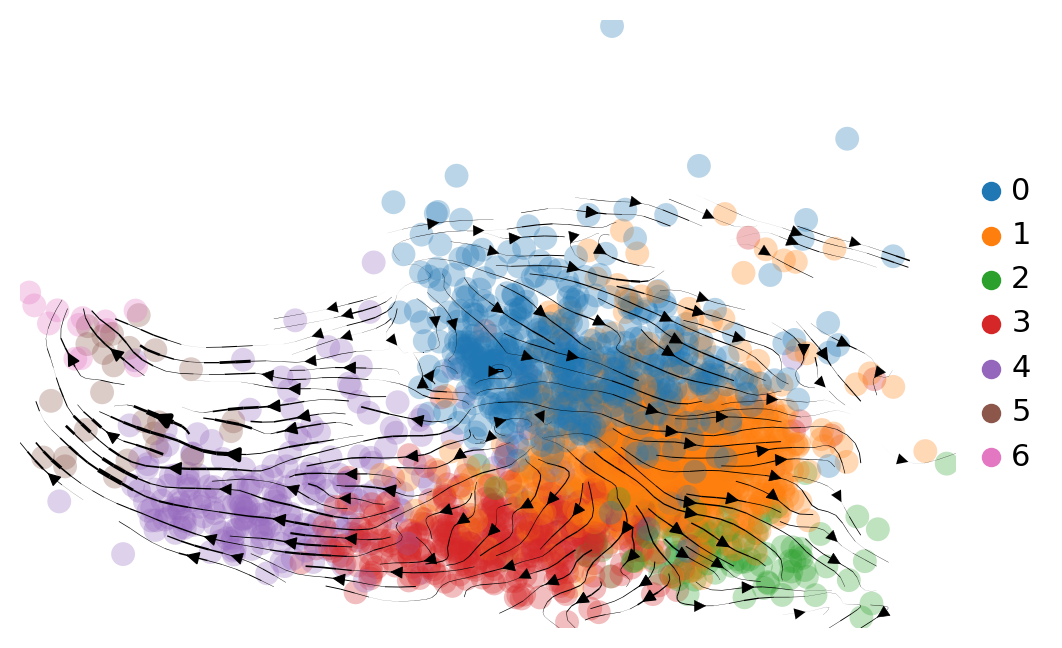

In [11]:
scv.pl.velocity_embedding_stream(adata, basis="X_umap_proj", color="celltype.svm", 
                                 title = "", palette=ident_colours, legend_loc="right")

In [12]:
scv.pl.velocity_embedding_stream(adata, basis="X_umap_proj", color="celltype.svm", 
                                 title = "", palette=ident_colours, 
                                 legend_loc="none", xlabel="", ylabel="", frameon=True, figsize=(4,4),
                                 save="case3_data/plots/velo_stream_projectSVR.png", dpi=600, show=False)

saving figure to file case3_data/plots/velo_stream_projectSVR.png


<AxesSubplot: >

In [13]:
scv.pl.velocity_embedding_stream(adata, basis="X_umap_harmony", color="celltype.svm", 
                                 title = "", palette=ident_colours, 
                                 legend_loc="none", xlabel="", ylabel="", frameon=True, figsize=(4,4),
                                 save="case3_data/plots/velo_stream_harmony.png", dpi=600, show=False)

saving figure to file case3_data/plots/velo_stream_harmony.png


<AxesSubplot: >

In [14]:
scv.pl.velocity_embedding_stream(adata, basis="X_umap_pca", color="celltype.svm", 
                                 title = "", palette=ident_colours, 
                                 legend_loc="none", xlabel="", ylabel="", frameon=True, figsize=(4,4),
                                 save="case3_data/plots/velo_stream_umap.png", show=False)

saving figure to file case3_data/plots/velo_stream_umap.png


<AxesSubplot: >